<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/VietNam_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam_Foods/Train', target_size=(150,150), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam_Foods/Test', target_size=(150,150), class_mode='categorical')
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

Found 4500 images belonging to 10 classes.
Found 1450 images belonging to 10 classes.
train_index : {'Banh cuon': 0, 'Banh mi': 1, 'Banh xeo': 2, 'Bun bo Hue': 3, 'Bun dau mam tom': 4, 'Chao long': 5, 'Com tam': 6, 'Goi cuon': 7, 'Mi quang': 8, 'Pho': 9}
test_index: {'Banh cuon': 0, 'Banh mi': 1, 'Banh xeo': 2, 'Bun Bo Hue': 3, 'Bun dau mam tom': 4, 'Chao long': 5, 'Com tam': 6, 'Goi cuon': 7, 'Mi Quang': 8, 'Pho': 9}


In [5]:
model= Sequential()
#CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(150,150,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =10

In [6]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [8]:
his=model.fit(train_data,epochs=30,batch_size=128,verbose=1,validation_data=test_data)
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

Epoch 1/30
141/141 [==============================] - 1337s 9s/step - loss: 2.2127 - accuracy: 0.1751 - val_loss: 2.0364 - val_accuracy: 0.2214
Epoch 2/30
141/141 [==============================] - 118s 835ms/step - loss: 1.9761 - accuracy: 0.2931 - val_loss: 1.8547 - val_accuracy: 0.3524
Epoch 3/30
141/141 [==============================] - 118s 836ms/step - loss: 1.7452 - accuracy: 0.3876 - val_loss: 1.8164 - val_accuracy: 0.3703
Epoch 4/30
141/141 [==============================] - 119s 845ms/step - loss: 1.3485 - accuracy: 0.5384 - val_loss: 1.3343 - val_accuracy: 0.5683
Epoch 5/30
141/141 [==============================] - 117s 828ms/step - loss: 0.7906 - accuracy: 0.7378 - val_loss: 1.3413 - val_accuracy: 0.5993
Epoch 6/30
141/141 [==============================] - 117s 833ms/step - loss: 0.3767 - accuracy: 0.8820 - val_loss: 1.6229 - val_accuracy: 0.5821
Epoch 7/30
141/141 [==============================] - 118s 839ms/step - loss: 0.1772 - accuracy: 0.9478 - val_loss: 1.8081 - v

In [9]:
model.save('/content/drive/MyDrive/Model Save/VietNam_Foods.h5')

<ipython-input-10-ec45916f0e69>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


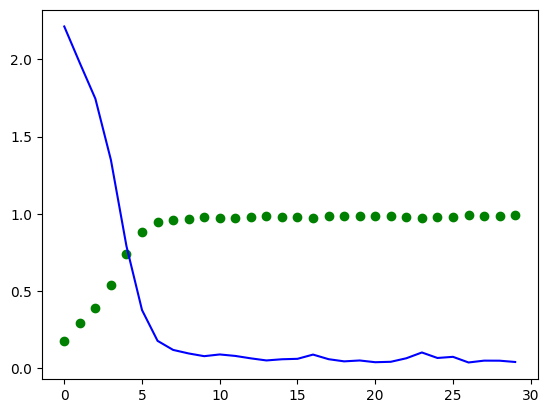

In [10]:
accuracy = his.history['accuracy']
loss = his.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [11]:
from keras.models import load_model
# load model save
model_vietnam_foods= load_model('/content/drive/MyDrive/Model Save/VietNam_Foods.h5')

1/1 [==============================] - 0s 238ms/step
Pho


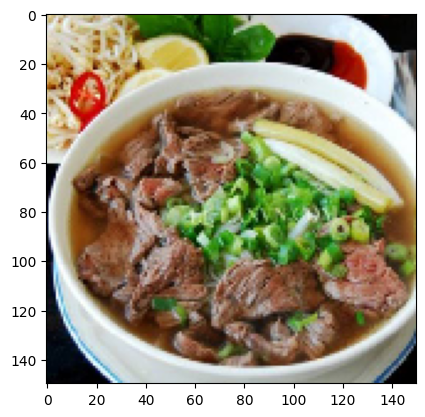

1/1 [==============================] - 0s 18ms/step
Com tam


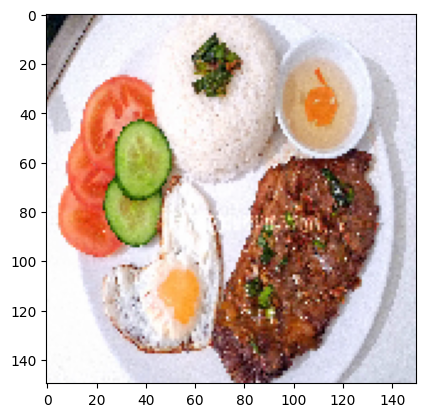

1/1 [==============================] - 0s 18ms/step
Chao long


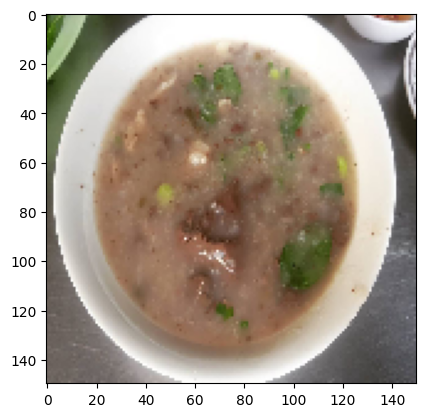

1/1 [==============================] - 0s 20ms/step
Mi quang


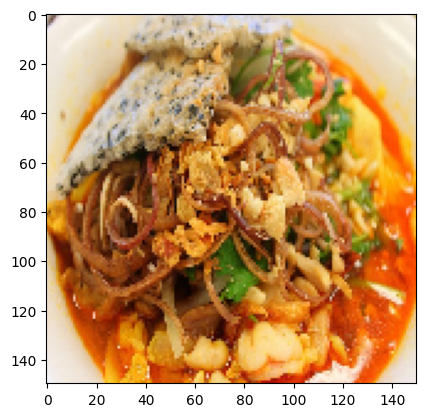

1/1 [==============================] - 0s 33ms/step
Bun bo Hue


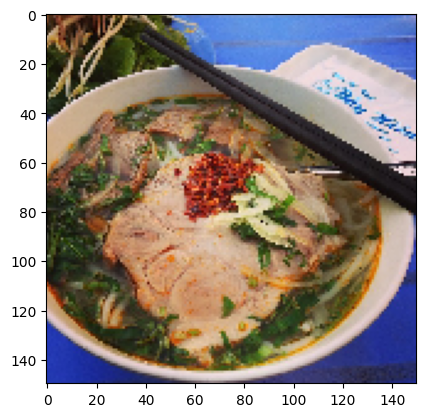

1/1 [==============================] - 0s 18ms/step
Goi cuon


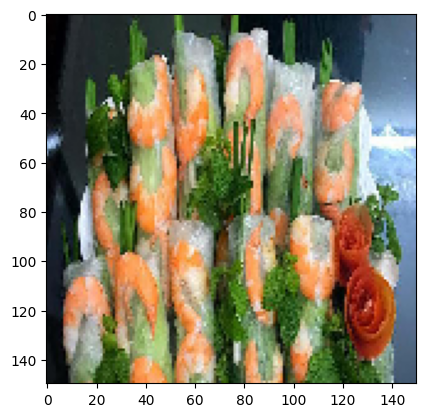

1/1 [==============================] - 0s 18ms/step
Banh xeo


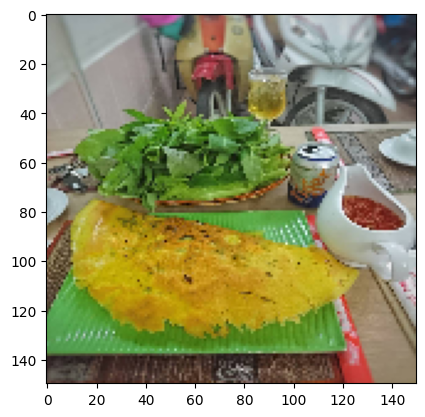

1/1 [==============================] - 0s 26ms/step
Bun dau mam tom


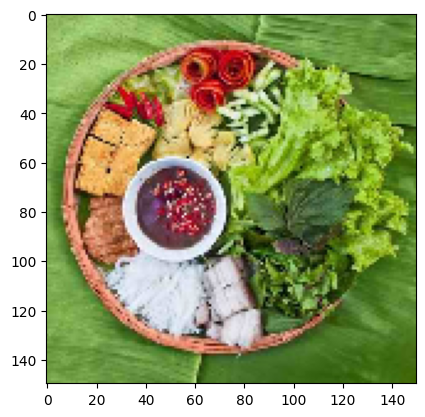

1/1 [==============================] - 0s 21ms/step
Banh mi


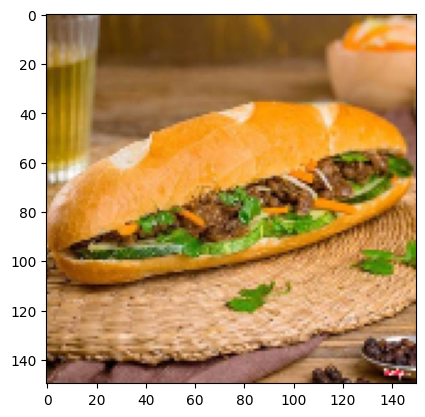

1/1 [==============================] - 0s 22ms/step
Banh cuon


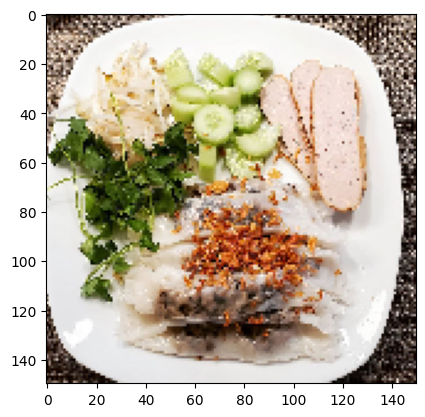

In [12]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/Exam Mid-Term AI Source Data/VietNam_Foods/Identify_test"

# Tạo tên hiện của các món ăn
name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue',
            'Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
# Quét hết các hình trong đường dẫn và tiến hành dự đoán các món ăn
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150), color_mode = 'rgb')
  plt.imshow(img)

  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_vietnam_foods.predict(img).argmax())

  print(name_foods[result])
  plt.show()